In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns

In [14]:
plt.style.use('ggplot')

In [2]:
df = pandas.read_csv("flattened.csv")

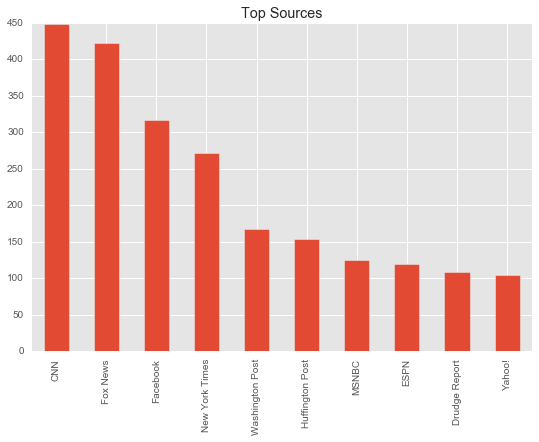

In [15]:
df.SOURCE.value_counts()[1:11].plot(kind='bar')
plt.title('Top Sources')

In [22]:
df.groupby('QKEY')['SOURCE'].value_counts()

QKEY          SOURCE                      
100446        .                               42
100588        .                               41
              ESPN                             1
100598        .                               42
101493        .                               27
              ABC                              3
              Etrade                           1
              Facebook                         1
              Fox News                         1
              Goldstar                         1
              KAYAK                            1
              KTLA? 5                          1
              Money Map Press                  1
              NBC                              1
              Patriot-News                     1
              The Motley Fool                  1
              Thrillist                        1
              VICE                             1
102009        .                               13
              New York Tim

In [52]:
from itertools import islice, izip
test = list(df[df.QKEY == 201501796068].SOURCE)
pairs = izip(*[iter(test)]*2)

In [54]:
for p in pairs: print p

('USA Today', 'Washington Post')
('New York Times', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', '.')
('.', 'Blog.moz.com')
('.', '.')
('.', '.')
('.', '.')
('.', '.')


## Let's do some network analysis


In [31]:
import networkx as nx

[2, 'spam']


{('spam', 2): <matplotlib.text.Text at 0x117faea50>}

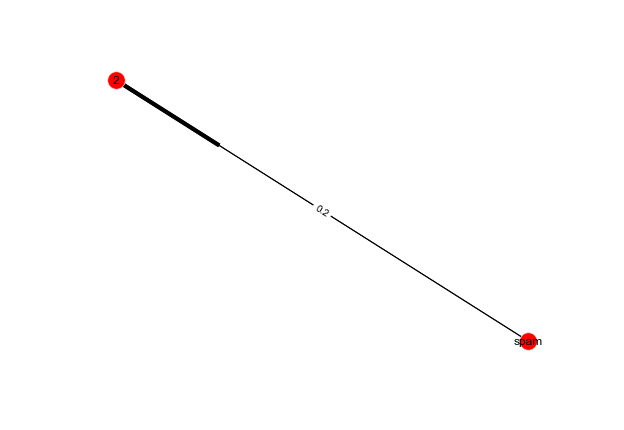

In [49]:
G=nx.DiGraph()
G.add_node("spam") 
G.add_edge("spam",2, weight=0.2) 
print(list(G.nodes()))

pos=nx.spring_layout(G) 
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

## tester

In [62]:
graph = {}
points = [("a","b",2),("b","c",1)]
# points can be a list of 3-tuples (points)
for p in points:
     p1, p2, w = p
     graph[p1] = {} 
     graph[p1][p2] = {}
     graph[p1][p2]['weight'] = w

In [63]:
graph

{'a': {'b': {'weight': 2}}, 'b': {'c': {'weight': 1}}}

In [64]:
G=nx.from_dict_of_dicts(graph)

{('a', 'b'): <matplotlib.text.Text at 0x117fcdad0>,
 ('c', 'b'): <matplotlib.text.Text at 0x1192ee710>}

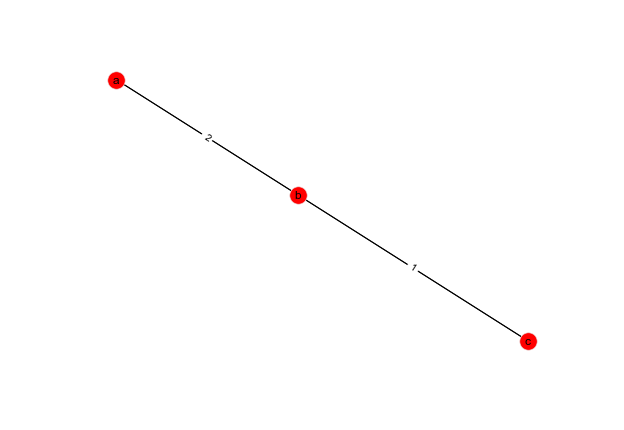

In [66]:
pos=nx.spring_layout(G) 
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [114]:
#df[df.QKEY==100588]

In [111]:
df_orig = pandas.read_csv("Data/NEWSSOURCE with standardized names.csv", index_col=0, dtype={'QKEY': str})

In [112]:
values = df_orig.values

In [113]:
values[0]

array(['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.'], dtype=object)

In [123]:
from itertools import izip

def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return izip(a, a)


graph = {}
for ls in values:
    for p1,p2 in pairwise(ls):
        if p1 not in graph.keys():
            graph[p1] = {}
        if p2 not in graph[p1].keys():
            graph[p1][p2] = {}
            graph[p1][p2]['weight'] = 1
        else:
            graph[p1][p2]['weight'] += 1
            

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 3: ordinal not in range(128)

In [116]:
graph

{' Warren Buffet mistake buying ibm': {'.': {'weight': 1}},
 '.': {'.': {'weight': 39228},
  '13 WMAZ': {'weight': 1},
  '13abc WTVG TV': {'weight': 1},
  '14 WFIE': {'weight': 2},
  '2016 Presidential Candidates - InsideGov?': {'weight': 1},
  '270towin.com': {'weight': 1},
  '6abc': {'weight': 3},
  '9NEWS Denver': {'weight': 1},
  'ABC': {'weight': 15},
  'ABC ': {'weight': 8},
  'ABC 33/40': {'weight': 1},
  'ABC 7': {'weight': 1},
  'ABC7 LA': {'weight': 1},
  'AJ+': {'weight': 3},
  'AM 760 KFMB': {'weight': 1},
  'AOL': {'weight': 6},
  'AWM.com': {'weight': 3},
  'Access Hollywood': {'weight': 1},
  'ActBlue': {'weight': 1},
  'Addicting Info': {'weight': 1},
  "Ain't It Cool News": {'weight': 1},
  'Al Jazeera': {'weight': 2},
  'Alaska Dispatch News': {'weight': 2},
  "Alex Jones' Info Wars": {'weight': 2},
  'Allen B. West': {'weight': 1},
  'Amber Alerts': {'weight': 1},
  'American Action News': {'weight': 1},
  'American Idol': {'weight': 1},
  'Andrew McKay': {'weight': 

In [117]:
G=nx.from_dict_of_dicts(graph)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd0 in position 4: ordinal not in range(128)

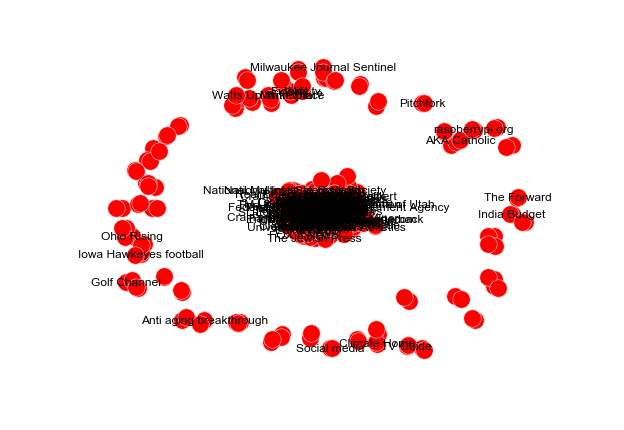

In [118]:
pos=nx.spring_layout(G) 
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)